In [51]:
# Basic libraries

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3 as sl3
from pprint import pprint


# Save Database as DataFrame
database_path ="Resources/hawaii.sqlite"
conn = sl3.connect(database_path)
cur = conn.cursor()
df_main = pd.read_sql_query("SELECT date as Date,prcp as Precipitation FROM measurement",conn).dropna().sort_values(by="Date").reset_index(drop=True)

# Get the latest date
df_main["Date"].max()

'2017-08-23'

In [53]:
# Get the last 12 month data
df_main_last12 = df_main[df_main["Date"] > "2016-09-01"].set_index("Date")

# Check DataFrame before plotting
df_main_last12

,Precipitation
Date,
2016-09-02,0.03
2016-09-02,0.02
2016-09-02,0.19
2016-09-02,0.00
2016-09-02,0.01
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


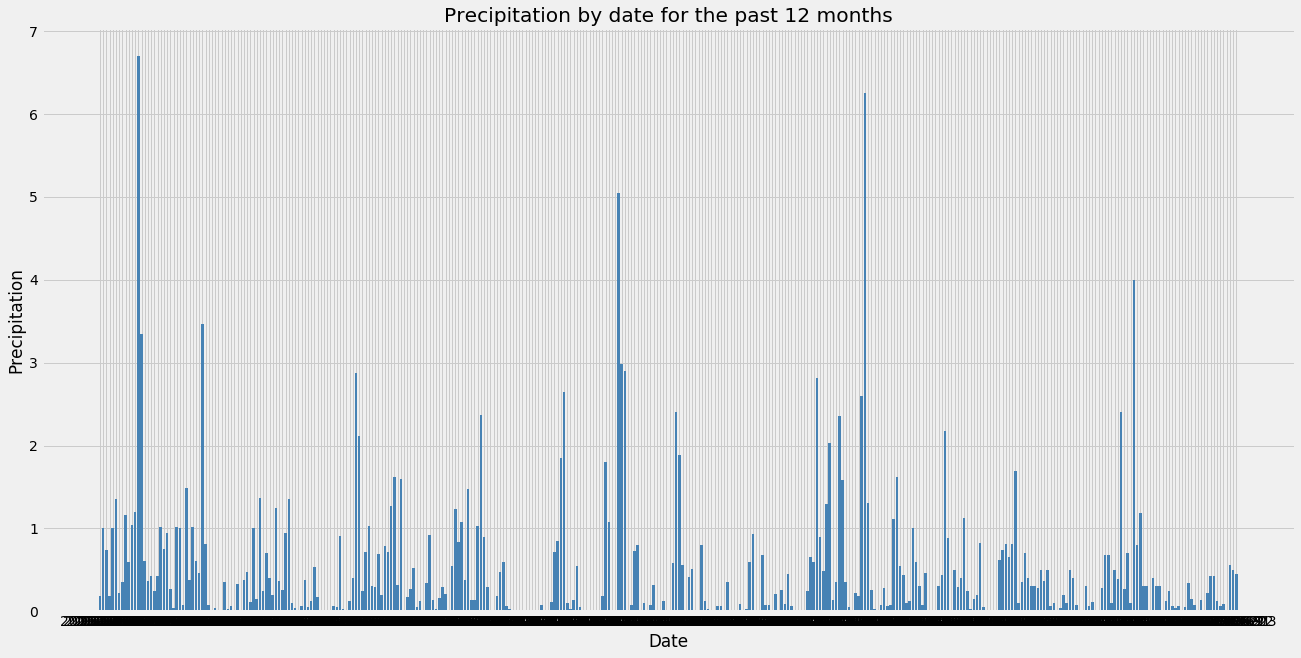

In [54]:
#PLotting

fig= plt.figure(figsize=(20,10))

x = df_main_last12.reset_index()["Date"]
y = df_main_last12["Precipitation"]

plt.bar(x,y, color ="steelblue")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation by date for the past 12 months")

plt.show()

In [57]:
# Summary statistics
df_main_last12.describe()

,Precipitation
count,1963.000000
mean,0.171900
std,0.452315
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [58]:
# Design a query to show how many stations are available in this dataset?
pprint(cur.execute("SELECT DISTINCT station from station").fetchall())


[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]


In [59]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pprint(cur.execute("SELECT station, COUNT(*) FROM measurement GROUP BY station ORDER by 2 DESC").fetchall())

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

Temp_Max = cur.execute("SELECT MAX(tobs) FROM measurement WHERE station = 'USC00519281' " ).fetchall()[0][0]
Temp_Min = cur.execute("SELECT MIN(tobs) FROM measurement WHERE station = 'USC00519281' " ).fetchall()[0][0] 
Temp_Avg = round(cur.execute("SELECT AVG(tobs) FROM measurement WHERE station = 'USC00519281' " ).fetchall()[0][0],1)

print(Temp_Max)
print(Temp_Min)
print(Temp_Avg)

x_axis = np.arange(Temp_Min,Temp_Max + 1)

85.0
54.0
71.7


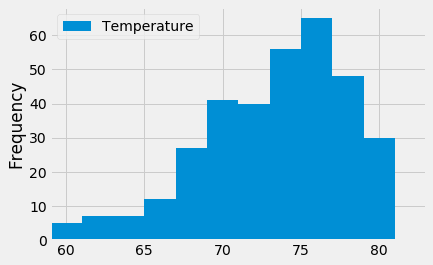

In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_main2 = pd.read_sql_query("SELECT tobs as Temperature FROM measurement WHERE (date > '2016-09-01') AND (station = 'USC00519281')",conn).dropna().reset_index(drop=True)

#Create 12 temperature Bins
Max_temp = max(df_main2["Temperature"])
Min_temp = min(df_main2["Temperature"])
bin_size = round((Max_temp-Min_temp)/12,0)
temp_bins = np.arange(Min_temp,Max_temp,bin_size)

plt.hist(df_main2["Temperature"], bins = temp_bins)
plt.ylabel("Frequency")
plt.legend(["Temperature"])
plt.xlim(Min_temp, Max_temp)
plt.show()